In [176]:
import os
import glob
import sys
import pickle

from typing import List

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datacat4ml.const import *

In [177]:
target_id_name_dict = {'CHEMBL233':'mor', 'CHEMBL237':'kor', 'CHEMBL236':'dor', 'CHEMBL2014':'nor'}
use_smote_dict = {True:True, 'None':False}

# Load files

In [178]:
# ============ bmk_clamp_df ============
bmk_clamp_df = pd.read_csv(os.path.join(BMK_CAT_DIR, 'results_clamp.csv'))
print(f'The shape of bmk_clamp_df is {bmk_clamp_df.shape}')
# replace the target_id with the target_name in column 'target'
bmk_clamp_df['target'] = bmk_clamp_df['target'].map(target_id_name_dict)
# replace the use_smote with True or False
bmk_clamp_df['use_smote'] = bmk_clamp_df['use_smote'].map(use_smote_dict)
short_cols = bmk_clamp_df.columns

# ============ bmk_tb_df ============
bmk_tb_df = pd.read_csv(os.path.join(BMK_CAT_DIR, 'results_tb.csv'))
print(f'The shape of bmk_tb_df is {bmk_tb_df.shape}')
# replace the target_id with the target_name in column 'target'
bmk_tb_df['target'] = bmk_tb_df['target'].map(target_id_name_dict)
# replace the use_smote with True or False
bmk_tb_df['use_smote'] = bmk_tb_df['use_smote'].map(use_smote_dict)

# ============ bmk_ml_df ============
bmk_ml_result_files = glob.glob(os.path.join(BMK_CAT_DIR, 'result_ml_*.csv'))
orig_bmk_ml_df = pd.concat([pd.read_csv(f) for f in bmk_ml_result_files], ignore_index=True)
#orig_bmk_ml_df['target'] = orig_bmk_ml_df['target'].map(target_id_name_dict)
long_cols = orig_bmk_ml_df.columns
bmk_ml_df = orig_bmk_ml_df[short_cols]
print(f'The shape of bmk_ml_df for ML is {bmk_ml_df.shape}')

## remove the rows where the column 'use_smote' is True
#bmk_ml_df = bmk_ml_df[~bmk_ml_df['use_smote']]
#print(f'The shape of bmk_ml_df for ML after removing the rows with use_smote is True is {bmk_ml_df.shape}')

# ============ bmk_ClipGPCR_df ============
bmk_ClipGPCR_df = pd.read_csv(os.path.join(BMK_CAT_DIR, 'result_ClipGPCR.csv'))
print(f'The shape of bmk_ClipGPCR_df is {bmk_ClipGPCR_df.shape}')

print(f'The columns of orig_bmk_ml_df are {orig_bmk_ml_df.columns}')

The shape of bmk_clamp_df is (58, 28)
The shape of bmk_tb_df is (58, 28)
The shape of bmk_ml_df for ML is (104, 28)
The shape of bmk_ClipGPCR_df is (9, 37)
The columns of orig_bmk_ml_df are Index(['file_path', 'task', 'use_clustering', 'use_smote', 'target', 'effect',
       'assay', 'std_type', 'descriptor', 'algo', 'n_compounds',
       'n_cliff_compounds', 'n_compounds_train', 'n_cliff_compounds_train',
       'n_compounds_test', 'n_cliff_compounds_test', 'threshold', 'n_actives',
       'n_inactives', 'active_ratio', 'n_active_train', 'n_inactive_train',
       'active_ratio_train', 'n_active_test', 'n_inactive_test',
       'active_ratio_test', 'accuracy', 'precision', 'recall', 'mcc',
       'bedroc_dec5', 'bedroc_2', 'bedroc_8', 'rmse', 'cliff_rmse', 'r2',
       'cliff_r2'],
      dtype='object')


In [179]:
## for column 'n_actives' in orig_bmk_ml_df, assign the value of 'n_actives' in bmk_tb_df to the corrresponding rows where the combination of these columns, including 'target', 'effect', 'assay' and 'std_type' are the same in the bmk_tb_df
#for col in ['n_actives']:
#    orig_bmk_ml_df[col] = clamp_df.apply(lambda x: bmk_tb_df[(bmk_tb_df['target']==x['target']) & (bmk_tb_df['effect']==x['effect']) & (bmk_tb_df['assay']==x['assay']) & (bmk_tb_df['std_type']==x['std_type'])][col].values[0], axis=1)

In [180]:
columns_ml =['use_clustering','use_smote',
          'target','effect','assay', 'std_type', 'descriptor', 'algo',
          'n_compounds', 'n_compounds_train', 'n_compounds_test',
          'threshold', 
#          'n_actives', ' n_inactives', 'active_ratio', 
#          ' n_active_train', ' n_inactive_train',' active_ratio_train', 
          'n_active_test', 'n_inactive_test','active_ratio_test', 
          'accuracy', 'precision', 'recall', 'mcc', 
#          ' bedroc_dec5', ' bedroc_2', ' bedroc_8'
          ]
columns_clamp_tb = ['use_clustering','use_smote',
                    'target','effect','assay', 'std_type', 'descriptor', 'algo',
                    'n_compounds', 'n_compounds_train', 'n_compounds_test',
                    'threshold', 
            #          'n_actives', ' n_inactives', 'active_ratio', 
            #          ' n_active_train', ' n_inactive_train',' active_ratio_train', 
            #          ' n_active_test', ' n_inactive_test',' active_ratio_test', 
                    'accuracy', 'precision', 'recall', 'mcc', 
            #          ' bedroc_dec5', ' bedroc_2', ' bedroc_8'
]

In [181]:
clamp_df = bmk_clamp_df[columns_clamp_tb]
print(f'The shape of clamp_df is {clamp_df.shape}')
clamp_df

The shape of clamp_df is (58, 16)


,use_clustering,use_smote,target,effect,assay,std_type,descriptor,algo,n_compounds,n_compounds_train,n_compounds_test,threshold,accuracy,precision,recall,mcc
0,True,False,dor,agon,G_cAMP,EC50,FP,CLAMP,125,98,27,5.000000,0.333333,0.0,0.0,0.0
1,True,False,nor,agon,G_cAMP,IC50,FP,CLAMP,69,53,16,5.000000,0.187500,0.0,0.0,0.0
2,True,False,dor,antag,G_GTP,IC50,FP,CLAMP,169,134,35,5.000000,0.314286,0.0,0.0,0.0
3,True,False,dor,antag,G_GTP,Ki,FP,CLAMP,73,57,16,5.000000,0.000000,0.0,0.0,0.0
4,True,False,dor,bind,RBA,IC50,FP,CLAMP,693,553,140,5.000000,0.271429,0.0,0.0,0.0
5,True,False,dor,bind,RBA,Ki,FP,CLAMP,4035,3227,808,5.000000,0.188119,0.0,0.0,0.0
6,True,False,kor,antag,G_GTP,Ki,FP,CLAMP,53,41,12,5.000000,0.000000,0.0,0.0,0.0
7,True,False,mor,bind,RBA,IC50,FP,CLAMP,582,464,118,5.830620,0.550847,0.0,0.0,0.0
8,True,False,kor,bind,RBA,Ki,FP,CLAMP,3860,3085,775,5.000000,0.113548,0.0,0.0,0.0
9,True,False,kor,antag,B_arrest,IC50,FP,CLAMP,53,40,13,5.000000,0.000000,0.0,0.0,0.0


In [182]:
tb_df = bmk_tb_df[columns_clamp_tb]
print(f'The shape of tb_df is {tb_df.shape}')
tb_df

The shape of tb_df is (58, 16)


,use_clustering,use_smote,target,effect,assay,std_type,descriptor,algo,n_compounds,n_compounds_train,n_compounds_test,threshold,accuracy,precision,recall,mcc
0,True,False,dor,agon,G_cAMP,EC50,FP,TB,125,98,27,5.000000,0.333333,0.000000,0.000000,0.000000
1,True,False,nor,agon,G_cAMP,IC50,FP,TB,69,53,16,5.000000,0.187500,0.000000,0.000000,0.000000
2,True,False,dor,antag,G_GTP,IC50,FP,TB,169,134,35,5.000000,0.314286,0.000000,0.000000,0.000000
3,True,False,dor,antag,G_GTP,Ki,FP,TB,73,57,16,5.000000,0.312500,1.000000,0.312500,0.000000
4,True,False,dor,bind,RBA,IC50,FP,TB,693,553,140,5.000000,0.521429,0.716049,0.568627,-0.032993
5,True,False,dor,bind,RBA,Ki,FP,TB,4035,3227,808,5.000000,0.631188,0.887446,0.625000,0.223429
6,True,False,kor,antag,G_GTP,Ki,FP,TB,53,41,12,5.000000,0.166667,1.000000,0.166667,0.000000
7,True,False,mor,bind,RBA,IC50,FP,TB,582,464,118,5.830620,0.415254,0.409091,0.679245,-0.137942
8,True,False,kor,bind,RBA,Ki,FP,TB,3860,3085,775,5.000000,0.522581,0.905371,0.515284,0.060174
9,True,False,kor,antag,B_arrest,IC50,FP,TB,53,40,13,5.000000,0.000000,0.000000,0.000000,0.000000


In [183]:
clip_df = bmk_ClipGPCR_df[columns_clamp_tb]
print(f'The shape of clip_bf is {clip_df.shape}')
clip_df

The shape of clip_bf is (9, 16)


,use_clustering,use_smote,target,effect,assay,std_type,descriptor,algo,n_compounds,n_compounds_train,n_compounds_test,threshold,accuracy,precision,recall,mcc
0,False,False,mor,antag,G_GTP,Ki,Token,ClipGPCR,61,48,13,5.000000,1.000000,0.558893,1.000000,0.000000
1,False,False,mor,agon,G_cAMP,EC50,Token,ClipGPCR,435,348,87,5.000000,0.660690,0.886076,0.958904,0.401900
2,False,False,mor,bind,RBA,IC50,Token,ClipGPCR,582,465,117,5.830620,0.758120,0.893617,0.711864,0.638085
3,False,False,mor,antag,G_GTP,IC50,Token,ClipGPCR,339,271,68,5.000000,0.560647,0.840000,0.976744,0.717760
4,False,False,mor,bind,RBA,Ki,Token,ClipGPCR,4654,3723,931,5.000000,0.789108,0.943807,0.979762,0.537911
5,False,False,mor,agon,B_arrest,EC50,Token,ClipGPCR,207,165,42,5.535809,0.633035,0.666667,0.750000,0.509525
6,False,False,mor,agon,G_Ca,EC50,Token,ClipGPCR,144,115,29,5.000000,0.528586,0.846154,0.956522,0.385543
7,False,False,mor,agon,G_GTP,EC50,Token,ClipGPCR,980,784,196,5.000000,0.697755,0.939759,0.928571,0.555368
8,False,False,mor,agon,G_cAMP,IC50,Token,ClipGPCR,55,44,11,5.000000,0.807809,0.909091,0.768355,0.000000


In [184]:
# only display the columns in the list 'columns for bmk_ml_df
ml_ratio_df = orig_bmk_ml_df[columns_ml]
print(f'The shape of ml_ratio_df is {ml_ratio_df.shape}')
ml_df = ml_ratio_df[columns_clamp_tb]
print(f'The shape of ml_df is {ml_df.shape}')
ml_df

The shape of ml_ratio_df is (104, 19)
The shape of ml_df is (104, 16)


,use_clustering,use_smote,target,effect,assay,std_type,descriptor,algo,n_compounds,n_compounds_train,n_compounds_test,threshold,accuracy,precision,recall,mcc
0,True,False,kor,agon,B_arrest,EC50,ECFP4,RFC,50,38,12,5.000000,0.583333,0.833333,0.555556,0.192450
1,True,False,mor,antag,G_GTP,Ki,ECFP4,RFC,61,47,14,5.000000,1.000000,1.000000,1.000000,1.000000
2,True,False,mor,agon,G_cAMP,EC50,ECFP4,RFC,435,346,89,5.000000,0.910112,0.938272,0.962025,0.510143
3,True,False,kor,bind,RBA,Ki,ECFP4,RFC,3860,3085,775,5.000000,0.925161,0.932600,0.986900,0.566086
4,True,False,kor,agon,G_GTP,EC50,ECFP4,RFC,1246,994,252,5.000000,0.861111,0.897561,0.929293,0.569275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,False,True,kor,agon,G_Ca,EC50,ECFP4,RFC,74,59,15,5.000000,1.000000,1.000000,1.000000,1.000000
100,False,True,kor,bind,RBA,IC50,ECFP4,RFC,416,332,84,5.774071,0.738095,0.815789,0.673913,0.489703
101,False,True,dor,agon,G_cAMP,EC50,ECFP4,RFC,125,100,25,5.000000,0.680000,0.777778,0.777778,0.206349
102,False,True,dor,antag,G_GTP,IC50,ECFP4,RFC,169,135,34,5.000000,0.911765,0.920000,0.958333,0.783203


In [185]:
concat_df = pd.concat([clamp_df, tb_df, clip_df, ml_df], ignore_index=True)
print(f'The shape of concat_df is {concat_df.shape}')

The shape of concat_df is (229, 16)


In [186]:
concat_df['algo'].value_counts()

RFC         104
CLAMP        58
TB           58
ClipGPCR      9
Name: algo, dtype: int64

# Donut plot for effect-wise activity space

## `def active_ratio_table`

In [187]:
input_df = ml_ratio_df 
target = 'mor'
pivot_values = [
    'effect',
    'assay',
    'std_type'
]

display_values = [
    'n_compounds',
    'active_ratio_test',
]

def active_ratio_table(input_df=ml_ratio_df, target='mor', pivot_values=['target', 'effect','assay','std_type'], display_values=['n_compounds','active_ratio_test']):

    # extract the rows where the column 'target' is 'kor' and the column 'use_clustering' is 'False' and the column 'use_smote' is 'False'
    target_df = input_df[(input_df['target'] == target) & (input_df['use_clustering'] == False) & (input_df['use_smote'] == False)].reset_index(drop=True) 
    print(f'The shape of target_df is {target_df.shape}')
    # extract the columns in the list 'pivot_values' and 'display_values'
    target_df = target_df[pivot_values + display_values]
    # create the pivot table
    target_len_df = pd.pivot_table(target_df, index=pivot_values, values=display_values)

    return target_len_df

In [188]:
mor_len_df = active_ratio_table(input_df=ml_ratio_df, target='mor')
kor_len_df = active_ratio_table(input_df=ml_ratio_df, target='kor')
dor_len_df = active_ratio_table(input_df=ml_ratio_df, target='dor')
nor_len_df = active_ratio_table(input_df=ml_ratio_df, target='nor')

The shape of target_df is (9, 19)
The shape of target_df is (9, 19)
The shape of target_df is (6, 19)
The shape of target_df is (5, 19)


In [189]:
mor_len_df

active_ratio_test  n_compounds
target effect assay    std_type                                
mor    agon   B_arrest EC50               0.380952          207
              G_Ca     EC50               0.793103          144
              G_GTP    EC50               0.857143          980
              G_cAMP   EC50               0.839080          435
                       IC50               0.909091           55
       antag  G_GTP    IC50               0.632353          339
                       Ki                 1.000000           61
       bind   RBA      IC50               0.504274          582
                       Ki                 0.902256         4654

In [190]:
kor_len_df 

active_ratio_test  n_compounds
target effect assay    std_type                                
kor    agon   B_arrest EC50               0.500000           50
              G_Ca     EC50               0.866667           74
              G_GTP    EC50               0.772000         1246
              G_cAMP   EC50               0.705882          253
       antag  B_arrest IC50               1.000000           53
              G_GTP    IC50               0.594595          185
                       Ki                 0.909091           53
       bind   RBA      IC50               0.547619          416
                       Ki                 0.900259         3860

In [191]:
dor_len_df

active_ratio_test  n_compounds
target effect assay  std_type                                
dor    agon   G_GTP  EC50               0.861538          648
              G_cAMP EC50               0.720000          125
       antag  G_GTP  IC50               0.705882          169
                     Ki                 0.933333           73
       bind   RBA    IC50               0.690647          693
                     Ki                 0.795539         4035

In [192]:
nor_len_df

active_ratio_test  n_compounds
target effect assay  std_type                                
nor    agon   G_GTP  EC50               0.822222          222
              G_cAMP IC50               0.928571           69
       antag  G_GTP  IC50               0.766667          150
       bind   RBA    IC50               0.904762          417
                     Ki                 0.965066         1142

## `def metrics_table`

In [193]:
input_df = concat_df
target = 'mor'
pivot_values = [
    'target',
    'effect',
    'assay',
    'std_type',
    'algo'
]

display_values = [
    'n_compounds',
    'accuracy', 
#    'precision', 
#    'recall', 
#    'mcc'
]

def metrics_table(input_df=concat_df, target='mor', pivot_values=[],display_values=[]):

    # extract the rows where the column 'target' is 'kor' and the column 'use_clustering' is 'False' and the column 'use_smote' is 'False'
    target_df = input_df[(input_df['target'] == target) & (input_df['use_clustering'] == False) & (input_df['use_smote'] == False)].reset_index(drop=True) 
    print(f'The shape of target_df is {target_df.shape}')
    # extract the columns in the list 'pivot_values' and 'display_values'
    target_df = target_df[pivot_values + display_values]
    # create the pivot table
    target_len_df = pd.pivot_table(target_df, index=pivot_values, values=display_values)

    return target_len_df

In [208]:
mor_metrics_df = metrics_table(input_df=concat_df, target='mor', pivot_values=pivot_values, display_values=display_values)
kor_metrics_df = metrics_table(input_df=concat_df, target='kor', pivot_values=pivot_values, display_values=display_values)
dor_metrics_df = metrics_table(input_df=concat_df, target='dor', pivot_values=pivot_values, display_values=display_values)
nor_metrics_df = metrics_table(input_df=concat_df, target='nor', pivot_values=pivot_values, display_values=display_values)

The shape of target_df is (36, 16)
The shape of target_df is (27, 16)
The shape of target_df is (18, 16)
The shape of target_df is (15, 16)


The shape of target_df is (36, 16)


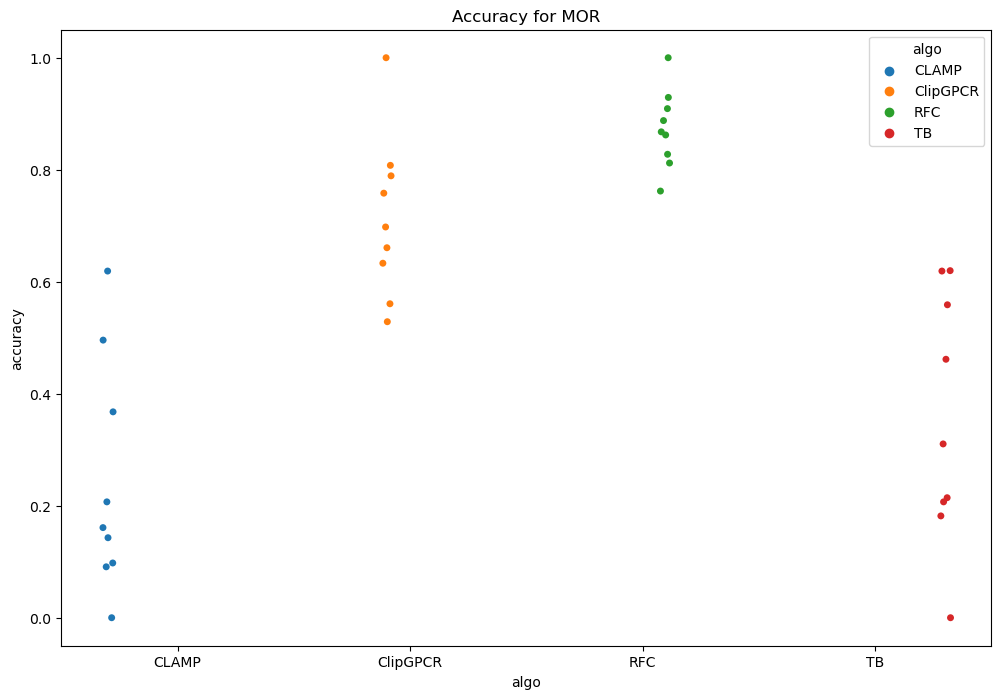

In [ ]:
mor_metrics_df
# for values in accuracy, keep only two decimal points
mor_metrics_df['accuracy'] = mor_metrics_df['accuracy'].map(lambda x: round(x,2))
mor_metrics_df

# for each combination of 'target', 'effect', 'assay' and 'std_type', plot the dot plot of 'accuracy' for different algorithms
def plot_metrics(input_df=concat_df, target='mor', pivot_values=['target','effect','assay', 'std_type'], display_values=['accuracy'], title='Accuracy'):
    # extract the rows where the column 'target' is 'kor' and the column 'use_clustering' is 'False' and the column 'use_smote' is 'False'
    target_df = input_df[(input_df['target'] == target) & (input_df['use_clustering'] == False) & (input_df['use_smote'] == False)].reset_index(drop=True) 
    print(f'The shape of target_df is {target_df.shape}')
    # extract the columns in the list 'pivot_values' and 'display_values'
    target_df = target_df[pivot_values + display_values]
    # create the pivot table
    target_len_df = pd.pivot_table(target_df, index=pivot_values, values=display_values)
    target_len_df = target_len_df.reset_index()
    # plot the dot plot
    plt.figure(figsize=(12,8))
    sns.stripplot(x='algo', y='accuracy', data=target_len_df, hue='algo', jitter=True, dodge=True)
    plt.title(title)
    plt.show()

plot_metrics(input_df=concat_df, target='mor', pivot_values=pivot_values, display_values=['accuracy'], title='Accuracy for MOR')

In [226]:
mor_metrics_df

accuracy  n_compounds
target effect assay    std_type algo                           
mor    agon   B_arrest EC50     CLAMP         0.62          207
                                ClipGPCR      0.63          207
                                RFC           0.76          207
                                TB            0.62          207
              G_Ca     EC50     CLAMP         0.21          144
                                ClipGPCR      0.53          144
                                RFC           0.83          144
                                TB            0.31          144
              G_GTP    EC50     CLAMP         0.14          980
                                ClipGPCR      0.70          980
                                RFC           0.89          980
                                TB            0.21          980
              G_cAMP   EC50     CLAMP         0.16          435
                                ClipGPCR      0.66          435
                                RFC           0.86          435
                                TB            0.21          435
                       IC50     CLAMP         0.09           55
                                ClipGPCR      0.81           55
                                RFC           0.91           55
                                TB            0.18           55
       antag  G_GTP    IC50     CLAMP         0.37          339
                                ClipGPCR      0.56          339
                                RFC           0.87          339
                                TB            0.56          339
                       Ki       CLAMP         0.00           61
                                ClipGPCR      1.00           61
                                RFC           1.00           61
                                TB            0.00           61
       bind   RBA      IC50     CLAMP         0.50          582
                                ClipGPCR      0.76          582
                                RFC           0.81          582
                                TB            0.46          582
                       Ki       CLAMP         0.10         4654
                                ClipGPCR      0.79         4654
                                RFC           0.93         4654
                                TB            0.62         4654

The shape of target_df is (36, 16)


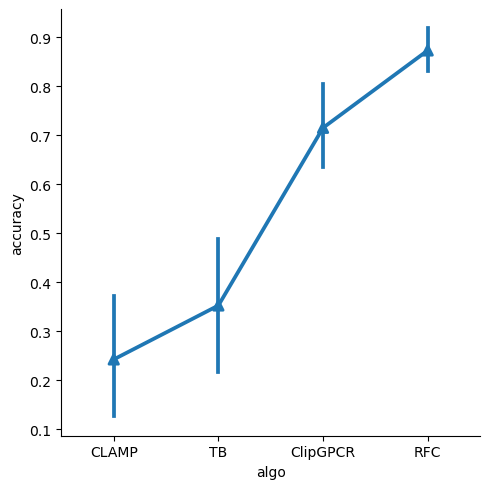

In [229]:
# plot the dot plot
#sns.stripplot(x='algo', y='accuracy', data=mor_metrics_df, hue='algo', jitter=True, dodge=True)

input_df = concat_df
target = 'mor'
# extract the rows where the column 'target' is 'kor' and the column 'use_clustering' is 'False' and the column 'use_smote' is 'False'
target_df = input_df[(input_df['target'] == target) & (input_df['use_clustering'] == False) & (input_df['use_smote'] == False)].reset_index(drop=True) 
print(f'The shape of target_df is {target_df.shape}')
# extract the columns in the list 'pivot_values' and 'display_values'
target_df = target_df[pivot_values + display_values]

sns.catplot(
    data=target_df, x="algo", y="accuracy", 
#    hue="n_compounds",
#    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

Text(0.5, 1.0, 'Accuracy based on mor')

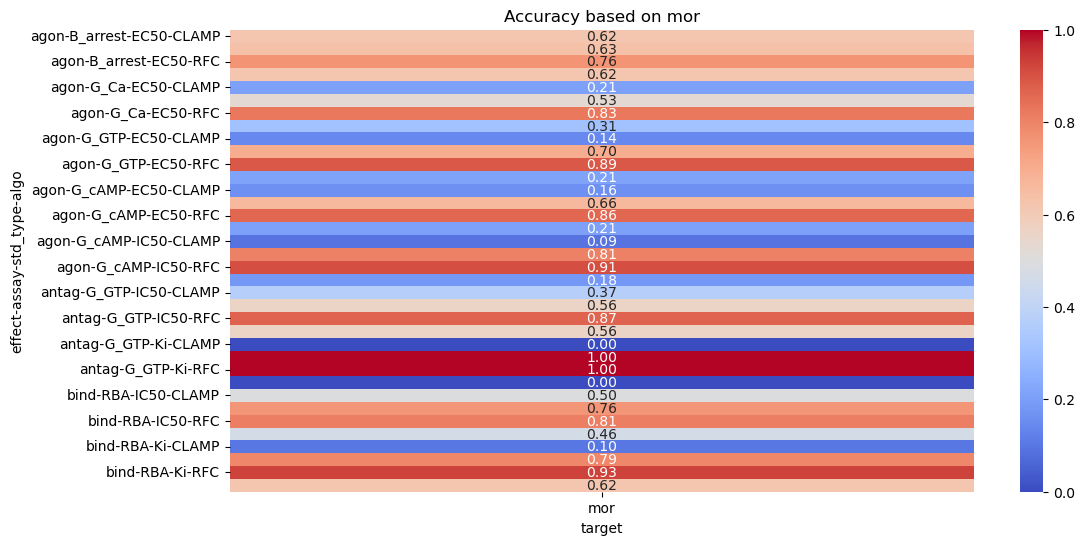

In [202]:
# plot the heatmap for the accuracy based on mor_metrics_df, which is pivot table
plt.figure(figsize=(12, 6))
sns.heatmap(mor_metrics_df['accuracy'].unstack(level=0), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Accuracy based on mor')


In [196]:
kor_metrics_df

accuracy  n_compounds
target effect assay    std_type algo                        
kor    agon   B_arrest EC50     CLAMP  0.500000           50
                                RFC    0.700000           50
                                TB     0.500000           50
              G_Ca     EC50     CLAMP  0.133333           74
                                RFC    0.866667           74
                                TB     0.200000           74
              G_GTP    EC50     CLAMP  0.228000         1246
                                RFC    0.844000         1246
                                TB     0.296000         1246
              G_cAMP   EC50     CLAMP  0.294118          253
                                RFC    0.843137          253
                                TB     0.313725          253
       antag  B_arrest IC50     CLAMP  0.000000           53
                                RFC    1.000000           53
                                TB     0.000000           53
              G_GTP    IC50     CLAMP  0.405405          185
                                RFC    0.783784          185
                                TB     0.432432          185
                       Ki       CLAMP  0.090909           53
                                RFC    0.909091           53
                                TB     0.181818           53
       bind   RBA      IC50     CLAMP  0.452381          416
                                RFC    0.773810          416
                                TB     0.511905          416
                       Ki       CLAMP  0.099741         3860
                                RFC    0.936528         3860
                                TB     0.522021         3860

In [197]:
dor_metrics_df

accuracy  n_compounds
target effect assay  std_type algo                        
dor    agon   G_GTP  EC50     CLAMP  0.138462          648
                              RFC    0.900000          648
                              TB     0.323077          648
              G_cAMP EC50     CLAMP  0.280000          125
                              RFC    0.720000          125
                              TB     0.280000          125
       antag  G_GTP  IC50     CLAMP  0.294118          169
                              RFC    0.941176          169
                              TB     0.411765          169
                     Ki       CLAMP  0.066667           73
                              RFC    0.933333           73
                              TB     0.266667           73
       bind   RBA    IC50     CLAMP  0.309353          693
                              RFC    0.848921          693
                              TB     0.496403          693
                     Ki       CLAMP  0.204461         4035
                              RFC    0.897150         4035
                              TB     0.607187         4035

In [198]:
nor_metrics_df

accuracy  n_compounds
target effect assay  std_type algo                        
nor    agon   G_GTP  EC50     CLAMP  0.177778          222
                              RFC    0.866667          222
                              TB     0.266667          222
              G_cAMP IC50     CLAMP  0.071429           69
                              RFC    0.928571           69
                              TB     0.071429           69
       antag  G_GTP  IC50     CLAMP  0.233333          150
                              RFC    1.000000          150
                              TB     0.333333          150
       bind   RBA    IC50     CLAMP  0.095238          417
                              RFC    0.940476          417
                              TB     0.571429          417
                     Ki       CLAMP  0.034934         1142
                              RFC    0.969432         1142
                              TB     0.624454         1142

In [200]:
bmk_clamp_df['accuracy']

0     0.333333
1     0.187500
2     0.314286
3     0.000000
4     0.271429
5     0.188119
6     0.000000
7     0.550847
8     0.113548
9     0.000000
10    0.250000
11    0.068702
12    0.239437
13    0.325000
14    0.604651
15    0.176471
16    0.127907
17    0.181818
18    0.312500
19    0.052174
20    0.250000
21    0.340426
22    0.107296
23    0.233333
24    0.071429
25    0.112360
26    0.000000
27    0.511905
28    0.214286
29    0.280000
30    0.071429
31    0.294118
32    0.066667
33    0.309353
34    0.204461
35    0.090909
36    0.495726
37    0.099741
38    0.000000
39    0.500000
40    0.138462
41    0.367647
42    0.405405
43    0.619048
44    0.133333
45    0.095238
46    0.142857
47    0.233333
48    0.034934
49    0.294118
50    0.177778
51    0.097744
52    0.206897
53    0.000000
54    0.160920
55    0.090909
56    0.452381
57    0.228000
Name: accuracy, dtype: float64

# Compare the model performance of ML, Clamp and TB